# Project Title : Quikr Car selling price prediction using Linear Regression
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. Fuel_Type which can have values Petrol or Diesel
2. Seller_Type which can have value Dealer or Individual 
3. Transmission which can have value Manual or Automatic
4. Car_Name

## DISCRETE: 
1. Owner which can have value 0 or 1 or 2 or 3
2. Kms_Driven
3. Year

## Continuous : 
1. Selling_Price
2. Present_Price


In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
import xgboost as xgb

In [11]:
from sklearn.tree import DecisionTreeRegressor 

In [12]:
from sklearn.metrics import r2_score

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
from sklearn.model_selection import cross_val_score,KFold

In [15]:
df=pd.read_csv('car data.csv')


In [16]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [17]:
df.isnull().sum() #count the number of null values for each feature 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [19]:
df.describe() #describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kms_Driven'>

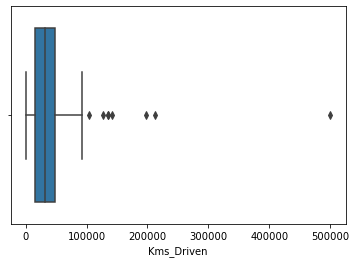

In [20]:
sns.boxplot(df['Kms_Driven'])

# Removing outlier using IQR

In [21]:
q1=df['Kms_Driven'].quantile(0.25)

In [22]:
q3=df['Kms_Driven'].quantile(0.75)

In [23]:
IQR=q3-q1

In [24]:
lower=q1-1.5*IQR

In [25]:
upper=q3+1.5*IQR

In [26]:
df=df[(df['Kms_Driven']>lower) & (df['Kms_Driven']<upper)]

In [27]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kms_Driven'>

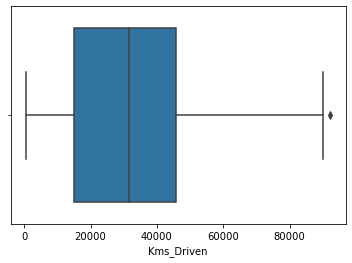

In [28]:
sns.boxplot(df['Kms_Driven'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Present_Price'>

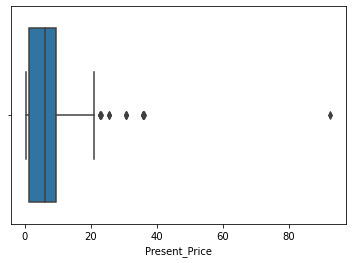

In [29]:
sns.boxplot(df['Present_Price'])

# Removing outlier using IQR

In [30]:
q1=df['Present_Price'].quantile(0.25)

In [31]:
q3=df['Present_Price'].quantile(0.75)

In [32]:
IQR=q3-q1

In [33]:
lower=q1-1.5*IQR

In [34]:
upper=q3+1.5*IQR

In [35]:
df=df[(df['Present_Price']>lower) & (df['Present_Price']<upper)]

In [36]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Present_Price'>

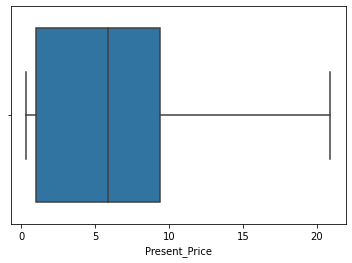

In [37]:
sns.boxplot(df['Present_Price'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

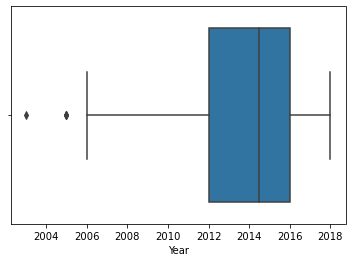

In [38]:
sns.boxplot(df['Year'])

# Removing outlier using IQR

In [39]:
q1=df['Year'].quantile(0.25)

In [40]:
q3=df['Year'].quantile(0.75)

In [41]:
IQR=q3-q1

In [42]:
lower=q1-1.5*IQR

In [43]:
upper=q3+1.5*IQR

In [44]:
df=df[(df['Year']>lower) & (df['Year']<upper)]

In [45]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Our data is clean, we will look at analyzing data through visualizations

<AxesSubplot:xlabel='Fuel_Type', ylabel='Present_Price'>

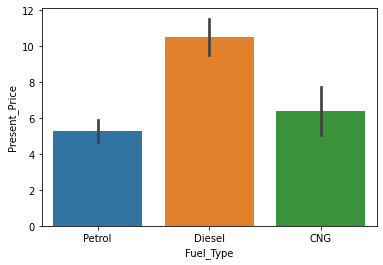

In [46]:
sns.barplot(x='Fuel_Type',y='Present_Price',data=df)

In [47]:
df.groupby('Fuel_Type')['Present_Price'].mean()

Fuel_Type
CNG        6.415000
Diesel    10.529149
Petrol     5.271518
Name: Present_Price, dtype: float64

In [48]:
df.pivot_table(values='Present_Price',index='Fuel_Type',aggfunc=np.mean)

,Present_Price
Fuel_Type,
CNG,6.415000
Diesel,10.529149
Petrol,5.271518


# Observations:
1. Average diesel fuel Type cars present price is maximum.
2. Average petrol fuel Type cars present price is minimum.

In [49]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [50]:
fuel_type_df=df.groupby('Fuel_Type')


In [51]:
fuel_type_df['Present_Price'].mean()

Fuel_Type
CNG        6.415000
Diesel    10.529149
Petrol     5.271518
Name: Present_Price, dtype: float64

<AxesSubplot:xlabel='Fuel_Type', ylabel='Present_Price'>

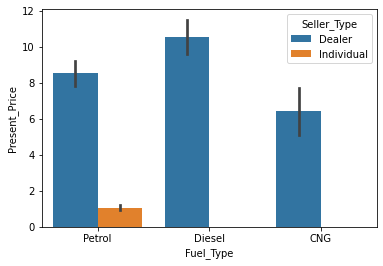

In [52]:
sns.barplot(x='Fuel_Type',y='Present_Price',data=df,hue='Seller_Type')

In [53]:
df.pivot_table(values='Present_Price',index='Fuel_Type',columns='Seller_Type',aggfunc=np.mean)

Seller_Type,Dealer,Individual
Fuel_Type,,
CNG,6.415000,NaN
Diesel,10.529149,NaN
Petrol,8.549206,1.057347


# Observations:
1. Diesel Fuel Type cars average present price is maximum where seller type is dealer 
2. CNG Fuel Type cars average present price is minimum where seller type is dealer
3. Petrol Fuel Type cars average present price for individual seller type is 1.05 lakhs 

<AxesSubplot:xlabel='Fuel_Type', ylabel='Present_Price'>

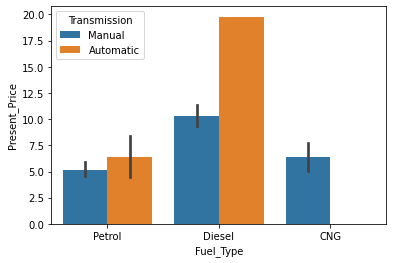

In [54]:
sns.barplot(x='Fuel_Type',y='Present_Price',data=df,hue='Transmission')

In [55]:
df.pivot_table(values=['Present_Price'],index=['Fuel_Type'],columns=['Transmission'],aggfunc=np.mean)

Present_Price           
Transmission     Automatic     Manual
Fuel_Type                            
CNG                    NaN   6.415000
Diesel           19.770000  10.328261
Petrol            6.343182   5.154802

# Observations:
1. Diesel fuel type cars average present price for automatic and manual transmission is maximum
2. Petrol fuel type cars average present price for manual is minimum
3. CNG fuel type cars average present price for automatic transmission is NaN
4. CNG fuel type cars average present price for manual is 6.4 lakhs 

<AxesSubplot:xlabel='Transmission', ylabel='Present_Price'>

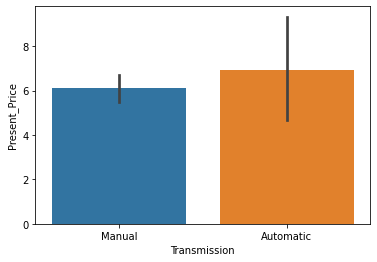

In [56]:
sns.barplot(x='Transmission',y='Present_Price',data=df)

In [57]:
df.pivot_table(values=['Present_Price'],index=['Transmission'],aggfunc=np.mean)

,Present_Price
Transmission,
Automatic,6.926957
Manual,6.116800


# Observations:
1. Manual transmission cars average present price : 6.11 lakhs
2. Automatic transmission cars average present price : 6.92 lakhs
3. Present price for automatic cars are higher than manual cars

<AxesSubplot:xlabel='Transmission', ylabel='Present_Price'>

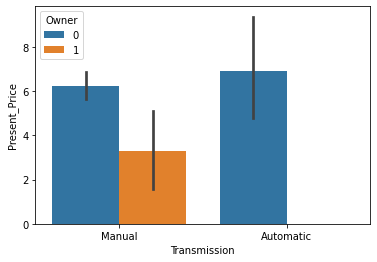

In [58]:
sns.barplot(x='Transmission',y='Present_Price',data=df,hue='Owner')

In [59]:
df.pivot_table(values=['Present_Price'],index=['Transmission'],columns='Owner',aggfunc=np.mean)

Present_Price       
Owner                    0      1
Transmission                     
Automatic         6.926957    NaN
Manual            6.233500  3.316

# Observations:
1. Manual transmission new cars average present price : 6.23 lakhs
2. Automatic transmission new cars average present price : 6.92 lakhs
3. Manual transmission used cars average present price : 3.316 lakhs
4. Automatic transmission used cars average present price : Nan

<AxesSubplot:xlabel='Seller_Type', ylabel='Present_Price'>

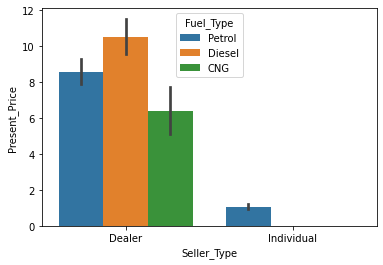

In [60]:
sns.barplot(x='Seller_Type',y='Present_Price',data=df,hue='Fuel_Type')

In [61]:
df.pivot_table(values=['Present_Price'],index=['Seller_Type'],columns='Fuel_Type',aggfunc=np.mean)

Present_Price                     
Fuel_Type             CNG     Diesel    Petrol
Seller_Type                                   
Dealer              6.415  10.529149  8.549206
Individual            NaN        NaN  1.057347

# Observations:
1. Average present price for CNG cars with seller type dealer : 6.41 lakhs 
2. Average present price for Diesel cars with seller type dealer : 10.52 lakhs
3. Average present price for Petrol cars with seller type dealer : 8.54 lakhs
4. Average present price for Petrol cars with seller type Individual : 1.05 lakhs

In [62]:
fuel_label=df['Fuel_Type'].value_counts().index


In [63]:
fuel_label_val=df['Fuel_Type'].value_counts().values


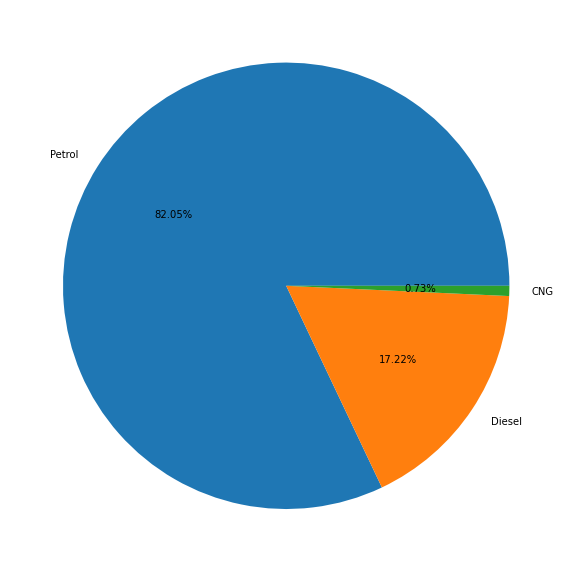

In [64]:
plt.figure(figsize=(10,15))
plt.pie(x=fuel_label_val,labels=fuel_label,data=df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Cars with Fuel type Petrol is 82.05% which is maximum.
2. Cars with Fuel type CNG is 0.73% which is minimum.
3. Cars with Fuel type Diesel is 17.22%.

In [65]:
df['Transmission'].value_counts()


Manual       250
Automatic     23
Name: Transmission, dtype: int64

In [66]:
transmission_label=df['Transmission'].value_counts().index


In [67]:
transmission_val=df['Transmission'].value_counts().values


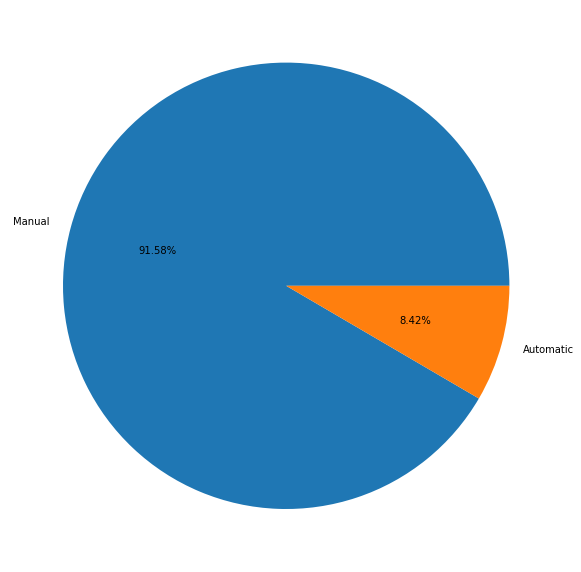

In [68]:
plt.figure(figsize=(10,15))
plt.pie(x=transmission_val,labels=transmission_label,data=df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Cars with transmission type manual is 91.58%.
2. Cars with transmission type automatic is 8.42%.


In [69]:
df['Seller_Type'].value_counts()


Dealer        175
Individual     98
Name: Seller_Type, dtype: int64

In [70]:
seller_Type_label=df['Seller_Type'].value_counts().index


In [71]:
Seller_Type_val=df['Seller_Type'].value_counts().values


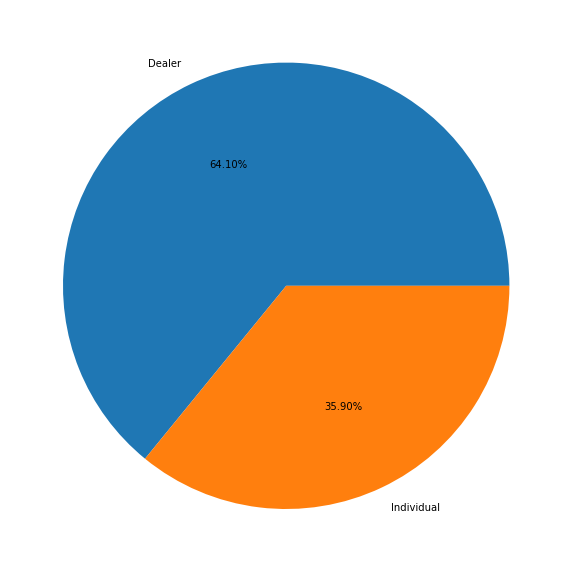

In [72]:
plt.figure(figsize=(10,15))
plt.pie(x=Seller_Type_val,labels=seller_Type_label,data=df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Cars with Seller type dealer is 64.10%.
2. Cars with Seller type individual is 35.90%.


In [73]:
df['Owner'].value_counts()


0    263
1     10
Name: Owner, dtype: int64

In [74]:
Owner_Type_label=df['Owner'].value_counts().index


In [75]:
Owner_Type_val=df['Owner'].value_counts().values


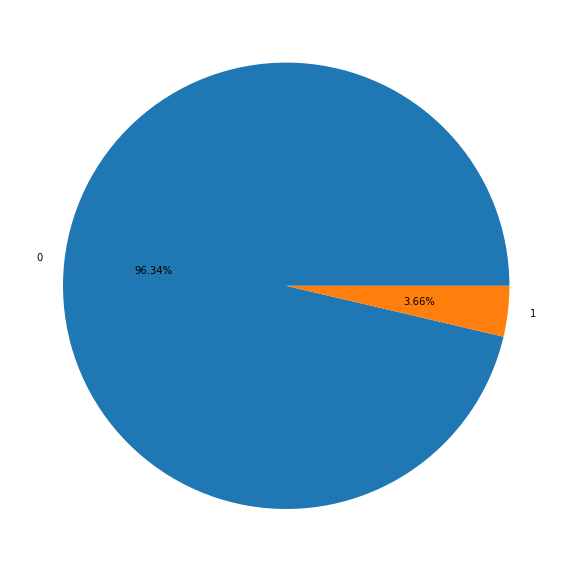

In [76]:
plt.figure(figsize=(10,15))
plt.pie(x=Owner_Type_val,labels=Owner_Type_label,data=df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Total new cars is 96.34%.
2. Total used cars (with 1 owner) is 3.66%.


<AxesSubplot:xlabel='Seller_Type', ylabel='Present_Price'>

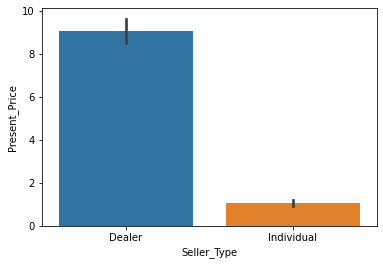

In [77]:
sns.barplot(x='Seller_Type',y='Present_Price',data=df)

In [78]:
df.pivot_table(values=['Present_Price'],index=['Seller_Type'],aggfunc=np.mean)

,Present_Price
Seller_Type,
Dealer,9.056571
Individual,1.057347


# Observations:
1. Average present price of cars with seller type dealer : 9.05 lakhs  
2. Average present price of cars with seller type individual : 1.05 lakhs 

<AxesSubplot:xlabel='Seller_Type', ylabel='Present_Price'>

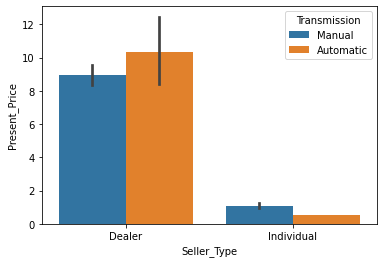

In [79]:
sns.barplot(x='Seller_Type',y='Present_Price',data=df,hue='Transmission')

In [80]:
df.pivot_table(values='Present_Price',index='Seller_Type',columns='Transmission',aggfunc=np.mean)

Transmission,Automatic,Manual
Seller_Type,,
Dealer,10.337333,8.9365
Individual,0.532500,1.1040


# Observations:
1. Average present price of cars with seller type dealer for transmission type manual: 8.93 lakhs  
2. Average present price of cars with seller type dealer for transmission type automatic : 10.33 lakhs 
3. Average present price of cars with seller type individual for transmission type manual: 1.104 lakhs  
4. Average present price of cars with seller type individual for transmission type automatic : 0.532 lakhs 


<AxesSubplot:xlabel='Fuel_Type', ylabel='Kms_Driven'>

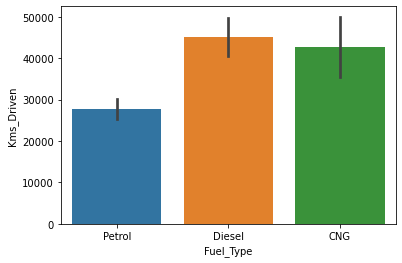

In [81]:
sns.barplot(x='Fuel_Type',y='Kms_Driven',data=df)

In [82]:
df.pivot_table(values=['Kms_Driven'],index=['Fuel_Type'],aggfunc=np.mean)

,Kms_Driven
Fuel_Type,
CNG,42749.000000
Diesel,45155.574468
Petrol,27797.200893


# Observations:
1. Average Kms_Driven for Diesel cars are maximum 
2. Average Kms_Driven for petrol cars are minimum 


<AxesSubplot:xlabel='Fuel_Type', ylabel='Kms_Driven'>

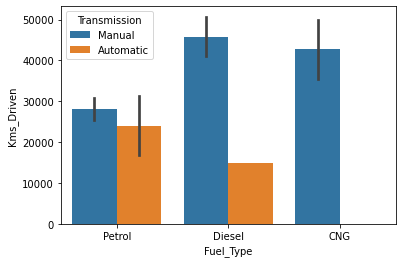

In [83]:
sns.barplot(x='Fuel_Type',y='Kms_Driven',data=df,hue='Transmission')

In [84]:
df.pivot_table(values='Kms_Driven',index='Fuel_Type',columns='Transmission',aggfunc=np.mean)

Transmission,Automatic,Manual
Fuel_Type,,
CNG,NaN,42749.000000
Diesel,15000.000000,45811.130435
Petrol,23893.545455,28222.351485


# Observations:
1. Average Kms_Driven for fuel type Petrol and tranmission type automatic is 23893.54 kms
2. Average Kms_Driven for fuel type Diesel and tranmission type automatic is 15000 kms
3. Average Kms_Driven for fuel type Diesel and tranmission type manual is 45811.13 kms
4. Average Kms_Driven for fuel type Petrol and tranmission type manual is 28222.35 kms


<AxesSubplot:xlabel='Transmission', ylabel='Kms_Driven'>

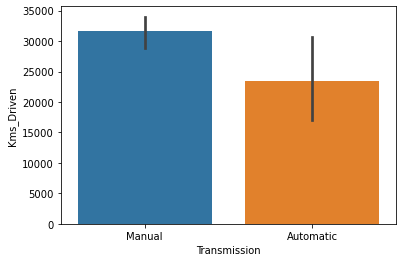

In [85]:
sns.barplot(x='Transmission',y='Kms_Driven',data=df)

In [86]:
df.pivot_table(values=['Kms_Driven'],index=['Transmission'],aggfunc=np.mean)

,Kms_Driven
Transmission,
Automatic,23506.869565
Manual,31574.900000


# Observations:
1. Average Kms_Driven for Manual transmission is 31574.90 Kms driven.
2. Average Kms_Driven for automatic transmission is 23506.86 Kms driven.


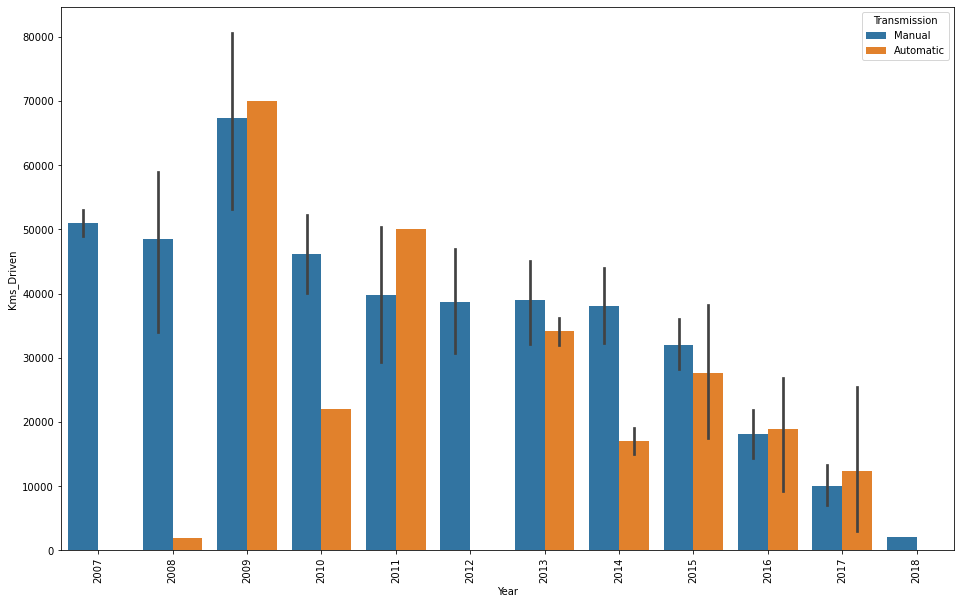

In [87]:
plt.figure(figsize=(16,10))
sns.barplot(x='Year',y='Kms_Driven',data=df,hue='Transmission')
plt.xticks(rotation=90)# Observations:
plt.show()

In [88]:
df.pivot_table(values='Kms_Driven',index='Year',columns='Transmission',aggfunc=np.mean)

Transmission,Automatic,Manual
Year,,
2007,NaN,51000.000000
2008,1900.0,48500.000000
2009,70000.0,67384.600000
2010,22000.0,46110.090909
2011,50000.0,39790.000000
2012,NaN,38745.333333
2013,34099.0,38914.500000
2014,17000.0,38060.352941
2015,27624.8,31953.528302


# Observations:


1. In the year 2009, average Km_Driven for automatic transmission was 70000 Kms_Driven and for manual transmission was 67384.60 kms_Driven which is maximum.

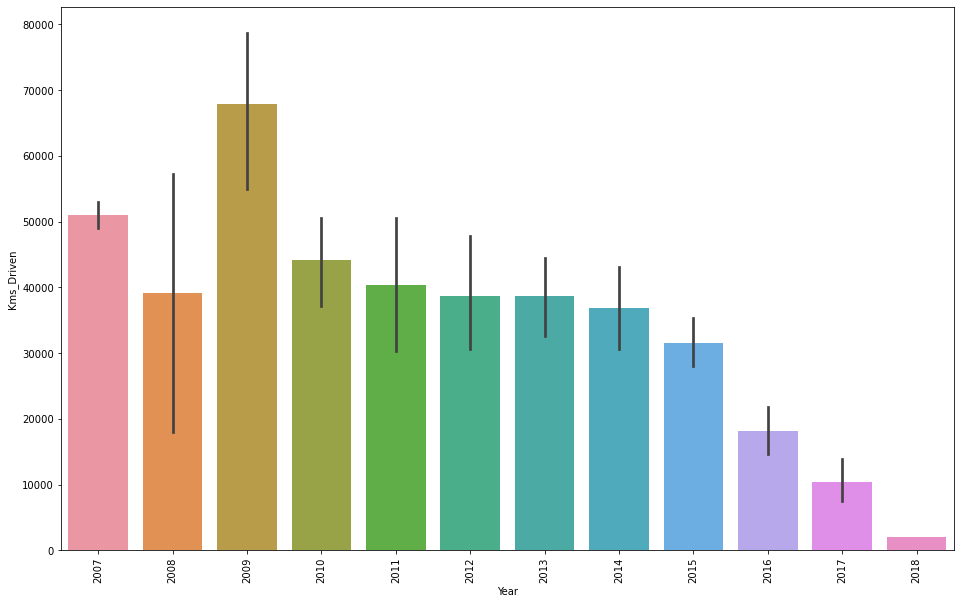

In [89]:
plt.figure(figsize=(16,10))
sns.barplot(x='Year',y='Kms_Driven',data=df)
plt.xticks(rotation=90)
plt.show()

In [90]:
df.pivot_table(values='Kms_Driven',index='Year',aggfunc=np.mean)

,Kms_Driven
Year,
2007,51000.000000
2008,39180.000000
2009,67820.500000
2010,44100.916667
2011,40327.368421
2012,38745.333333
2013,38613.531250
2014,36890.333333
2015,31580.362069


# Observations:


1. In the year 2009, avg Km_Driven was 67820.5 Kms_Driven which is maximum.
2. In the year 2018, avg Km_Driven was 2071.0 Kms_Driven which is minimum.


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

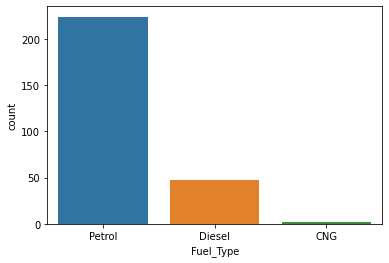

In [91]:
sns.countplot(df['Fuel_Type'])

In [92]:
df.groupby('Fuel_Type').size()

Fuel_Type
CNG         2
Diesel     47
Petrol    224
dtype: int64

# Observations:
1. Cars with fuel type petrol is 224 which is maximum.
2. Cars with fuel type diesel is 47.
3. Cars with fuel type CNG is 2 which is minimum.


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

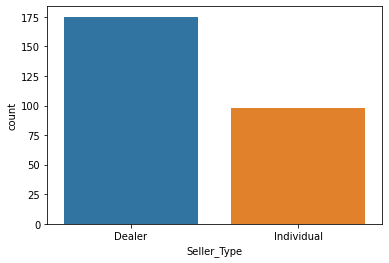

In [93]:
sns.countplot(df['Seller_Type'])

In [94]:
df.groupby('Seller_Type').size()

Seller_Type
Dealer        175
Individual     98
dtype: int64

# Observations:
1. Cars with seller type dealer is 175 which is maximum.
2. Cars with seller type Individual is 98 which is minimum. 


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

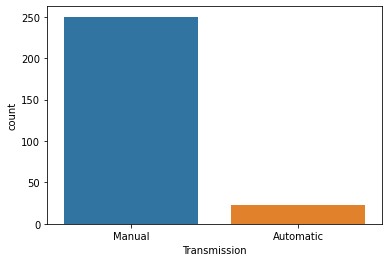

In [95]:
sns.countplot(df['Transmission'])

In [96]:
df.groupby('Transmission').size()

Transmission
Automatic     23
Manual       250
dtype: int64

# Observations:
1. Cars with transmission type automatic is 23 which is minimum.
2. Cars with transmission type manual is 250 which is maximum. 


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

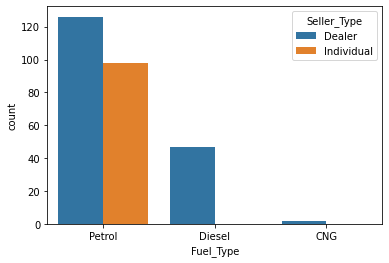

In [97]:
sns.countplot(df['Fuel_Type'],hue=df['Seller_Type'])

In [98]:
pd.crosstab(index=df['Fuel_Type'],columns=df['Seller_Type'],margins=True)

Seller_Type,Dealer,Individual,All
Fuel_Type,,,
CNG,2,0,2
Diesel,47,0,47
Petrol,126,98,224
All,175,98,273


In [99]:
df.groupby('Fuel_Type')['Seller_Type'].value_counts()


Fuel_Type  Seller_Type
CNG        Dealer           2
Diesel     Dealer          47
Petrol     Dealer         126
           Individual      98
Name: Seller_Type, dtype: int64

# Observations:
1. Cars with fuel type petrol are maximum.
2. Cars with fuel type CNG are minimum.
3. Total cars : 273



C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

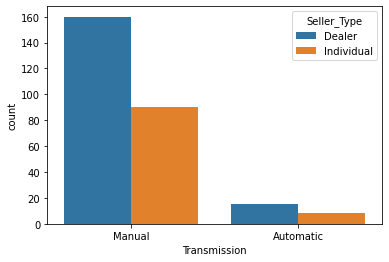

In [100]:
sns.countplot(df['Transmission'],hue=df['Seller_Type'])

In [101]:
pd.crosstab(index=df['Transmission'],columns=df['Seller_Type'],margins=True)

Seller_Type,Dealer,Individual,All
Transmission,,,
Automatic,15,8,23
Manual,160,90,250
All,175,98,273


In [102]:
df.groupby('Transmission')['Seller_Type'].value_counts()

Transmission  Seller_Type
Automatic     Dealer          15
              Individual       8
Manual        Dealer         160
              Individual      90
Name: Seller_Type, dtype: int64

# Observations:
1. Total cars with transmission type manual and seller type dealer is 160
2. Total cars with transmission type manual and seller type individual is 90
3. Total cars with transmission type automatic and seller type dealer is 15
4. Total cars with transmission type automatic and seller type individual is 8
5. Total cars : 273
6. Total cars with Seller Type automatic is 23 
7. Total cars with Seller Type manual is 250 




C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

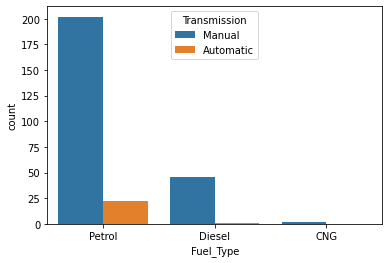

In [103]:
sns.countplot(df['Fuel_Type'],hue=df['Transmission'])

In [104]:
pd.crosstab(index=df['Fuel_Type'],columns=df['Transmission'],margins=True)

Transmission,Automatic,Manual,All
Fuel_Type,,,
CNG,0,2,2
Diesel,1,46,47
Petrol,22,202,224
All,23,250,273


In [105]:
df.groupby('Fuel_Type')['Transmission'].value_counts()

Fuel_Type  Transmission
CNG        Manual            2
Diesel     Manual           46
           Automatic         1
Petrol     Manual          202
           Automatic        22
Name: Transmission, dtype: int64

# Observations:
1. Total cars with transmission type manual and fuel type petrol is 202 which is maximum 
2. Total cars with transmission type manual and fuel type CNG is 2 which is minimum
3. Total cars with transmission type automatic and fuel type petrol is 22 which is maximum 
4. Total cars with transmission type automatic and fuel type CNG is 0 which is minimum
5. Total cars : 273
6. Total cars with Seller Type automatic is 23 
7. Total cars with Seller Type manual is 250 




C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

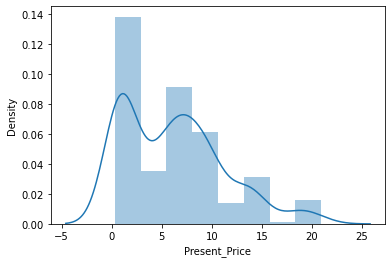

In [106]:
sns.distplot(df['Present_Price'])

# Transformation using sqrt

In [107]:
df['Present_Price']=np.sqrt(df['Present_Price'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_23788\3990615968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Present_Price']=np.sqrt(df['Present_Price'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

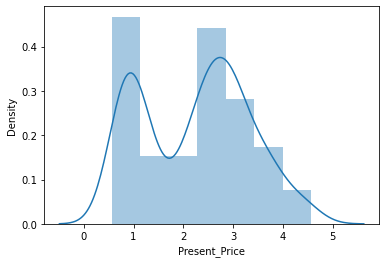

In [108]:
sns.distplot(df['Present_Price'])

In [109]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,2.364318,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,3.088689,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,3.138471,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,2.037155,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,2.621068,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,3.405877,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,2.428992,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,3.316625,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,3.535534,9000,Diesel,Dealer,Manual,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

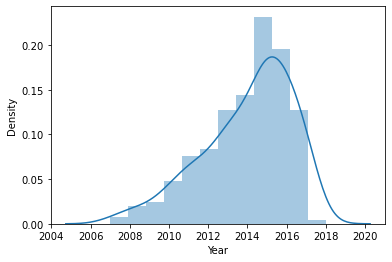

In [110]:
sns.distplot(df['Year'])

# Transformation using log

In [111]:
df['Year']=np.log(df['Year'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_23788\1902470974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=np.log(df['Year'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

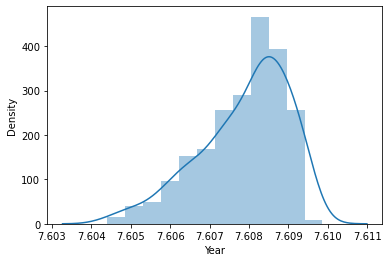

In [112]:
sns.distplot(df['Year'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

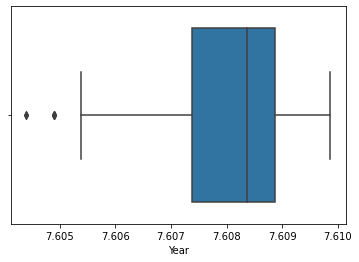

In [113]:
sns.boxplot(df['Year'])

In [114]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,7.607878,3.35,2.364318,27000,Petrol,Dealer,Manual,0
1,sx4,7.607381,4.75,3.088689,43000,Diesel,Dealer,Manual,0
2,ciaz,7.609367,7.25,3.138471,6900,Petrol,Dealer,Manual,0
3,wagon r,7.606387,2.85,2.037155,5200,Petrol,Dealer,Manual,0
4,swift,7.607878,4.60,2.621068,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,7.608871,9.50,3.405877,33988,Diesel,Dealer,Manual,0
297,brio,7.608374,4.00,2.428992,60000,Petrol,Dealer,Manual,0
298,city,7.605392,3.35,3.316625,87934,Petrol,Dealer,Manual,0
299,city,7.609367,11.50,3.535534,9000,Diesel,Dealer,Manual,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

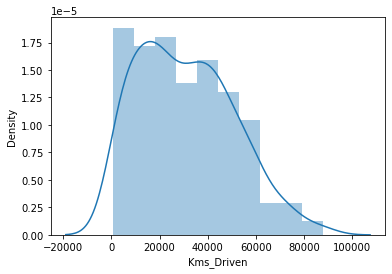

In [115]:
sns.distplot(df['Kms_Driven'])

In [116]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,7.607878,3.35,2.364318,27000,Petrol,Dealer,Manual,0
1,sx4,7.607381,4.75,3.088689,43000,Diesel,Dealer,Manual,0
2,ciaz,7.609367,7.25,3.138471,6900,Petrol,Dealer,Manual,0
3,wagon r,7.606387,2.85,2.037155,5200,Petrol,Dealer,Manual,0
4,swift,7.607878,4.60,2.621068,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,7.608871,9.50,3.405877,33988,Diesel,Dealer,Manual,0
297,brio,7.608374,4.00,2.428992,60000,Petrol,Dealer,Manual,0
298,city,7.605392,3.35,3.316625,87934,Petrol,Dealer,Manual,0
299,city,7.609367,11.50,3.535534,9000,Diesel,Dealer,Manual,0


In [117]:
df.drop('Car_Name',axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_23788\2513657829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Car_Name',axis=1,inplace=True)


In [118]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7.607878,3.35,2.364318,27000,Petrol,Dealer,Manual,0
1,7.607381,4.75,3.088689,43000,Diesel,Dealer,Manual,0
2,7.609367,7.25,3.138471,6900,Petrol,Dealer,Manual,0
3,7.606387,2.85,2.037155,5200,Petrol,Dealer,Manual,0
4,7.607878,4.60,2.621068,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,7.608871,9.50,3.405877,33988,Diesel,Dealer,Manual,0
297,7.608374,4.00,2.428992,60000,Petrol,Dealer,Manual,0
298,7.605392,3.35,3.316625,87934,Petrol,Dealer,Manual,0
299,7.609367,11.50,3.535534,9000,Diesel,Dealer,Manual,0


# Label Encoding is a technique that is used to convert categorical columns into numerical

In [119]:
le=LabelEncoder() 

In [120]:
df['Seller_Type']=le.fit_transform(df['Seller_Type'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_23788\3846434838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seller_Type']=le.fit_transform(df['Seller_Type'])


In [121]:
df['Transmission']=le.fit_transform(df['Transmission'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_23788\3494759109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transmission']=le.fit_transform(df['Transmission'])


In [122]:
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_23788\4095468849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])


In [123]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7.607878,3.35,2.364318,27000,2,0,1,0
1,7.607381,4.75,3.088689,43000,1,0,1,0
2,7.609367,7.25,3.138471,6900,2,0,1,0
3,7.606387,2.85,2.037155,5200,2,0,1,0
4,7.607878,4.60,2.621068,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,7.608871,9.50,3.405877,33988,1,0,1,0
297,7.608374,4.00,2.428992,60000,2,0,1,0
298,7.605392,3.35,3.316625,87934,2,0,1,0
299,7.609367,11.50,3.535534,9000,1,0,1,0


In [124]:
y=df['Selling_Price']

In [125]:
X=df.drop('Selling_Price',axis=1)

In [126]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7.607878,2.364318,27000,2,0,1,0
1,7.607381,3.088689,43000,1,0,1,0
2,7.609367,3.138471,6900,2,0,1,0
3,7.606387,2.037155,5200,2,0,1,0
4,7.607878,2.621068,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,7.608871,3.405877,33988,1,0,1,0
297,7.608374,2.428992,60000,2,0,1,0
298,7.605392,3.316625,87934,2,0,1,0
299,7.609367,3.535534,9000,1,0,1,0


In [127]:
sc=StandardScaler()

In [128]:
X=sc.fit_transform(X) #Fit to data, then transform it.

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#Split arrays or matrices into random train and test subsets.

In [130]:
lr=LinearRegression()


In [131]:
lr.fit(X_train,y_train) #training the model using X train and Y train 

LinearRegression()

In [132]:
predict=lr.predict(X_test) #predicting value of dependent feature based on independent feature 


In [133]:
predict

array([ 3.88878252,  0.50309506,  2.98045191,  2.5810109 ,  6.2615877 ,
        0.35187872,  4.91928799,  5.39476858,  4.18219301,  8.22422105,
        8.54177808,  9.60226551,  7.88989217,  2.65135599, -2.03877365,
        5.69991909,  4.47892204,  0.55999251,  1.28884932,  8.86209347,
        9.1520952 ,  6.35577702,  7.14259635,  0.51400504,  6.37106657,
        6.57269143,  4.56055863,  5.3123629 ,  1.88644343,  2.02861787,
        0.97536069,  6.72750148,  1.71660343,  6.66172652,  7.07664199,
        5.79048183,  4.90667252,  8.77750913,  0.92046101,  0.55754759,
        2.80160579,  1.10784613,  8.99707176,  3.8338732 ,  2.8749996 ,
        0.36218739,  1.49867262,  1.71641099,  0.83882897,  0.5838487 ,
        7.74077217,  1.09889099,  5.12644962,  4.60139379,  1.2127958 ])

In [134]:
r2_score(y_test,predict) 
#r2_score method tells the amount of the variation in the predicted value and actual value

0.8831692682368194

# Observations:
1. Our Model can accurately predict 88 times correct out of 100
2. Model accuracy is 88.31%

In [135]:
rfr=RandomForestRegressor(n_estimators=100)

In [136]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [137]:
y_pred=rfr.predict(X_test)

In [138]:
r2_score(y_test,y_pred)

0.9318984340067004

# Observations:
1. Our Model can accurately predict 93 times correct out of 100
2. Model accuracy is 93.18%

In [139]:
xgb_r=xgb.XGBRegressor()


In [140]:
xgb_r.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [141]:
y_pred=xgb_r.predict(X_test)

In [142]:
r2_score(y_test,y_pred)

0.9480398626646981

# Observations:
1. Our Model can accurately predict 94 times correct out of 100
2. Model accuracy is 94.80%

In [143]:
dtr=DecisionTreeRegressor()


In [144]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [145]:
y_pred=dtr.predict(X_test)


In [146]:
r2_score(y_test,y_pred)

0.920362731740915

# Observations:
1. Our Model can accurately predict 92 times correct out of 100
2. Model accuracy is 92.03%

In [147]:
knr=KNeighborsRegressor()


In [148]:
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [149]:
y_pred=knr.predict(X_test)

In [150]:
r2_score(y_test,y_pred)

0.8917881443233022

# Observations:
1. Our Model can accurately predict 89 times correct out of 100
2. Model accuracy is 89.91%